# Battle of Neighbourhood Capstone Project

# BUSINESS ANALYSIS
Toronto is the provincial capital of Ontario and the most populous city in Canada, with a population of 2,731,571 as of 2016. Current to 2016, the Toronto census metropolitan area (CMA), of which the majority is within the Greater Toronto Area (GTA), held a population of 5,928,040, making it Canada's most populous CMA. The city is the anchor of the Golden Horseshoe, an urban agglomeration of 9,245,438 people (as of 2016) surrounding the western end of Lake Ontario.Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world.

The diverse population of Toronto reflects its current and historical role as an important destination for immigrants to Canada. More than 50 percent of residents belong to a visible minority population group,and over 200 distinct ethnic origins are represented among its inhabitants.While the majority of Torontonians speak English as their primary language, over 160 languages are spoken in the city.

According to the 2016 Census, the racial composition of Toronto was: White: 50.2% East Indian: 12.7% (10.8% Chinese, 1.4% Korean, 0.5% Japanese) South Asian: 12.3% Black: 8.5% Southeast Asian: 7.0% (5.1% Filipino) Latin American: 2.8% West Asian: 2.0% Arab: 1.1% Aborginal: 0.7% (0.5% First Nations, 0.2% Metis) Two or more races: 1.5% Other race: 1.3%

With it's diverse culture , comes diverse food items. There are many resturants in Toronto, each beloning to different categories like Chinese , Indian , French , Italian etc.

On Jan. 1, 1998, Toronto's amalgamation took effect, merging the six previous municipalities that made up Metro Toronto – Etobicoke, Scarborough, York, East York, North York, and the City of Toronto, into a new singular City of Toronto. So as part of this project , we will list and visualize all major parts of Toronto that has great indian resturants.

Conclusion Based on Dataset( Neighbourhood rating Likes , rated & Tips) • What is best location in Toronto for Indian Cuisine ? • Which areas have potential Indian Resturant Market ? • Which all areas lack Indian Restaurants ?

Data
For this project we need the following data : • Toronto data that contains list Boroughs, Neighborhoods along with their latitude and longitude.  Data source : https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M  Description : This data set contains the required information. And we will use this data set to explore various neighborhoods of Toronto  Use Beautiful soup to Scrap library • Indian restaurants in each neighborhood of Toronto  Data source : Fousquare API  Description : By using this api we will get all the venues in each neighborhood. We can filter these venues to get only indian Restaurants. • GeoSpace data- 'https://cocl.us/Geospatial_data'  Description : By using this geo space data we will get the Toronto Borough boundaries that will help us visualize choropleth map. Approach  Collect the Toronto data from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M and 'https://cocl.us/Geospatial_data' for Lattitude and Longitude • Using FourSquare API we will find all venues for each neighborhood. • Filter out all venues that are Indian Restaurants. • Find rating , tips and like count for each Indian Restaurants using FourSquare API. • Using rating for each restaurant , we will sort that data. • Visualize the Ranking of neighborhoods using folium library(python) Conclusion Based on Dataset( Neighbourhood rating Likes , rated & Tips) • What is best location in Toronto for Indian Cuisine ? • Which areas have potential Indian Resturant Market ? • Which all areas lack Indian Restaurants ? Analysis We will import the required libraries for python. • pandas and numpy for handling data. • request module for using FourSquare API. • geopy to get co-ordinates of Toronto • folium to visualize the results on a map




In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

In [2]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library
import csv
import pandas as pd

In [3]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"XczEpQpAMF0AACSsfq4AAADG","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":920980179,"wgRevisionId":920980179,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communi

In [5]:
Raj_table = soup.find('table',{'class':'wikitable'})
Raj_table


<table class="wikitable sortable">
<tbody><tr>
<th>Postcode</th>
<th>Borough</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A</td>
<td>Not assigned</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
</td></tr>
<tr>
<td>M4A</td>
<td><a href="/wiki/North_York" title="North York">North York</a></td>
<td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Harbourfront_(Toronto)" title="Harbourfront (Toronto)">Harbourfront</a>
</td></tr>
<tr>
<td>M5A</td>
<td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
<td><a href="/wiki/Regent_Park" title="Regent Park">Regent Park</a>
</td></tr>
<tr>
<td>M6A</td>

In [6]:
print(Raj_table.tr.text)


Postcode
Borough
Neighbourhood



In [7]:
headers = 'Postalcode','Borough','Neighbourhood'

In [8]:
Rajtable1=""
for tr in Raj_table.find_all('tr'):
    row1=""
    for tds in tr.find_all('td'):
        row1=row1+","+tds.text
    Rajtable1=Rajtable1+row1[1:]
print(Rajtable1)


M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Harbourfront
M5A,Downtown Toronto,Regent Park
M6A,North York,Lawrence Heights
M6A,North York,Lawrence Manor
M7A,Queen's Park,Not assigned
M8A,Not assigned,Not assigned
M9A,Etobicoke,Islington Avenue
M1B,Scarborough,Rouge
M1B,Scarborough,Malvern
M2B,Not assigned,Not assigned
M3B,North York,Don Mills North
M4B,East York,Woodbine Gardens
M4B,East York,Parkview Hill
M5B,Downtown Toronto,Ryerson
M5B,Downtown Toronto,Garden District
M6B,North York,Glencairn
M7B,Not assigned,Not assigned
M8B,Not assigned,Not assigned
M9B,Etobicoke,Cloverdale
M9B,Etobicoke,Islington
M9B,Etobicoke,Martin Grove
M9B,Etobicoke,Princess Gardens
M9B,Etobicoke,West Deane Park
M1C,Scarborough,Highland Creek
M1C,Scarborough,Rouge Hill
M1C,Scarborough,Port Union
M2C,Not assigned,Not assigned
M3C,North York,Flemingdon Park
M3C,North York,Don Mills South
M4C,East York,Woodbine Heights
M

In [9]:
file=open("toronto.csv","wb")
#file.write(bytes(headers,encoding="ascii",errors="ignore"))
file.write(bytes(Rajtable1,encoding="ascii",errors="ignore"))

8738

In [10]:
Rajdf = pd.read_csv('toronto.csv',header=None)
Rajdf.columns=["Postalcode","Borough","Neighbourhood"]
Rajdf.head(10)

,Postalcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


In [11]:
a1 = pd.read_csv('https://cocl.us/Geospatial_data')
gdf = pd.DataFrame(a1)
gdf

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [12]:
# Get indexes for which column Borough has value as "Not assigned"
indexNames = Rajdf[ Rajdf['Borough'] =='Not assigned'].index

# Delete these row indexes from dataFrame
Rajdf.drop(indexNames , inplace=True)

Rajdf.loc[Rajdf['Neighbourhood'] =='Not assigned' , 'Neighbourhood'] = Rajdf['Borough']
Rajdf.head(10)

,Postalcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Queen's Park
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


In [13]:
gdf.columns=['Postalcode','Latitude','Longitude']

In [14]:
result = Rajdf.groupby(['Postalcode','Borough'], sort=False).agg( ', '.join)
Rajdf_new=result.reset_index()
Rajdf_new.head(20)

,Postalcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [15]:
result = Rajdf.groupby(['Postalcode','Borough'], sort=False).agg( ', '.join)
Rajdf_new=result.reset_index()
Rajdf_new.head(20)

,Postalcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [16]:
Rajtdf = pd.merge(Rajdf_new,
                 gdf[['Postalcode','Latitude', 'Longitude']],
                 on='Postalcode')

In [17]:
Rajtdf.head(10)

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


In [18]:
Rajtdf.shape

(103, 5)

In [19]:
print('The dataframe has {} borough and {} Neighbourhood.'.format(
        len(Rajtdf['Borough'].unique()),
        Rajtdf.shape[0]
    )
)


The dataframe has 11 borough and 103 Neighbourhood.


In [20]:
Rajtdf.head(5)

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494


In [21]:
Rajtdf.drop("Postalcode", axis=1,inplace = True)  

In [22]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [23]:
CLIENT_ID = 'DSGXQU11TNB4PIN4WLALYZKLONRHN1CBUNHKWCITAFUVIATK' # your Foursquare ID
CLIENT_SECRET = 'BBWKNZGT4UEU45FUOS3HLOUUR5CCHPTZXE05LU5ZVGIFAEUC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
    


Your credentails:
CLIENT_ID: DSGXQU11TNB4PIN4WLALYZKLONRHN1CBUNHKWCITAFUVIATK
CLIENT_SECRET:BBWKNZGT4UEU45FUOS3HLOUUR5CCHPTZXE05LU5ZVGIFAEUC


In [24]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    
  #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)  
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [25]:
def get_venue_details(venue_id):
        
    CLIENT_ID ='DSGXQU11TNB4PIN4WLALYZKLONRHN1CBUNHKWCITAFUVIATK' # your Foursquare ID
    CLIENT_SECRET ='BBWKNZGT4UEU45FUOS3HLOUUR5CCHPTZXE05LU5ZVGIFAEUC' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [26]:
print ('venue_details')

venue_details


In [27]:
Rajtdf.head(10)

,Borough,Neighbourhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,Queen's Park,Queen's Park,43.662301,-79.389494
5,Etobicoke,Islington Avenue,43.667856,-79.532242
6,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,North York,Don Mills North,43.745906,-79.352188
8,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


In [28]:
import matplotlib.pyplot as plt

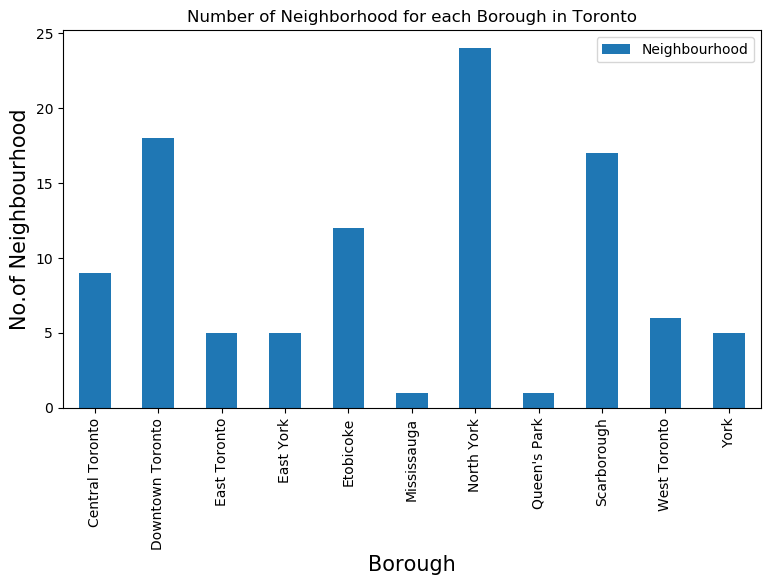

In [29]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighbourhood', fontsize=15)
#giving a bar plot
Rajtdf.groupby('Borough')['Neighbourhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [30]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighbourhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in Rajtdf.values.tolist():
    Borough, Neighbourhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(Rajtdf),')','Indian Resturants in '+Neighbourhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 103 ) Indian Resturants in Parkwoods, North York:0
( 2 / 103 ) Indian Resturants in Victoria Village, North York:0
( 3 / 103 ) Indian Resturants in Harbourfront, Regent Park, Downtown Toronto:1
( 4 / 103 ) Indian Resturants in Lawrence Heights, Lawrence Manor, North York:0
( 5 / 103 ) Indian Resturants in Queen's Park, Queen's Park:1
( 6 / 103 ) Indian Resturants in Islington Avenue, Etobicoke:0
( 7 / 103 ) Indian Resturants in Rouge, Malvern, Scarborough:0
( 8 / 103 ) Indian Resturants in Don Mills North, North York:0
( 9 / 103 ) Indian Resturants in Woodbine Gardens, Parkview Hill, East York:0
( 10 / 103 ) Indian Resturants in Ryerson, Garden District, Downtown Toronto:0
( 11 / 103 ) Indian Resturants in Glencairn, North York:0
( 12 / 103 ) Indian Resturants in Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park, Etobicoke:0
( 13 / 103 ) Indian Resturants in Highland Creek, Rouge Hill, Port Union, Scarborough:0
( 14 / 103 ) Indian Resturants in Flemingdon Par

In [31]:
indian_rest_ny.head(103)

,Borough,Neighbourhood,ID,Name
0,Downtown Toronto,"Harbourfront, Regent Park",52af6dc5498e33995b0bbf03,Sultan Of Samosas
1,Queen's Park,Queen's Park,4bedf8b5e24d20a17b567214,Kothur Indian Cuisine
2,East Toronto,The Beaches,4dcd7c6352b1f8915b7e7f7e,Delhi Bistro
3,Scarborough,Woburn,4c632edeedd320a19ad5ae29,Bombay Palace
4,East York,Leaside,504bcf32e4b0ef19b0e2ecf8,Mt Everest Restaurant
5,Downtown Toronto,Christie,4adb969ef964a520332921e3,Banjara Indian Cuisine
6,Downtown Toronto,Christie,4b7369d7f964a52049ad2de3,Madras Masala
7,Scarborough,Cedarbrae,4d6008f829ef236a8832a059,CANBE Foods Inc
8,Scarborough,Cedarbrae,4c77fc87bd346dcb8c90f0ef,La Sani Grill
9,East York,Thorncliffe Park,4daf08e66e81e2dffdd4fe40,Iqbal Kebab & Sweet Centre


In [32]:
indian_rest_ny.shape

(45, 4)

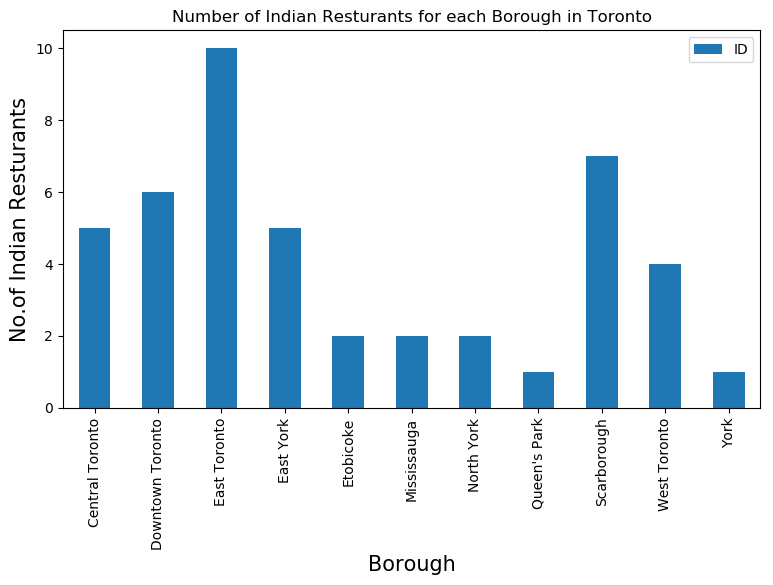

In [33]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Borough in Toronto')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

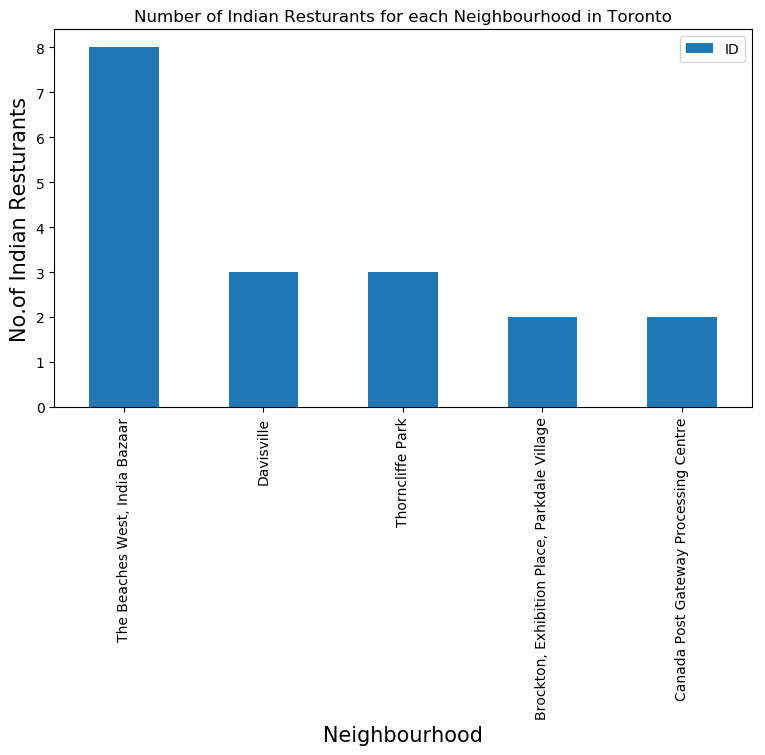

In [34]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Resturants for each Neighbourhood in Toronto')
#On x-axis
plt.xlabel('Neighbourhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Resturants', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Neighbourhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [35]:
indian_rest_ny[indian_rest_ny['Neighbourhood']=='The Beaches West, India Bazaar']

,Borough,Neighbourhood,ID,Name
17,East Toronto,"The Beaches West, India Bazaar",4ae0c7a8f964a520638221e3,Udupi Palace
18,East Toronto,"The Beaches West, India Bazaar",4afc9816f964a520312422e3,Motimahal
19,East Toronto,"The Beaches West, India Bazaar",4bac30a2f964a52018ea3ae3,Bombay Chowpatty
20,East Toronto,"The Beaches West, India Bazaar",4ad9052cf964a520301721e3,Regency Restaurant
21,East Toronto,"The Beaches West, India Bazaar",4bbcc0efa0a0c9b60ebd1a0f,Haandi 2000
22,East Toronto,"The Beaches West, India Bazaar",4d8d278a1d06b1f712942a3b,Gautama
23,East Toronto,"The Beaches West, India Bazaar",4ae4c793f964a5201b9e21e3,The Famous Indian Restaurant
24,East Toronto,"The Beaches West, India Bazaar",4c427065ce54e21eefc30c1a,Baldev Paan House


In [36]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighbourhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighbourhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighbourhood': Neighbourhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID               Name  Likes  Rating  Tips
0  52af6dc5498e33995b0bbf03  Sultan Of Samosas      9     6.8     4
( 1 / 45 ) processed
                         ID                   Name  Likes  Rating  Tips
0  4bedf8b5e24d20a17b567214  Kothur Indian Cuisine     16     8.2    19
( 2 / 45 ) processed
                         ID          Name  Likes  Rating  Tips
0  4dcd7c6352b1f8915b7e7f7e  Delhi Bistro      6     6.7     3
( 3 / 45 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 4c632edeedd320a19ad5ae29
( 4 / 45 ) processed
                         ID                   Name  Likes  Rating  Tips
0  504bcf32e4b0ef19b0e2ecf8  Mt Everest Restaurant      8     6.2     6
( 5 / 45 ) processed
                         ID                    Name  Likes  Rating  Tips
0  4adb969ef964a520332921e3  Banjara Indian Cuisine    142     8.8    75
( 6 / 45 ) processed
                         ID           Name  Likes  Rating  T

In [37]:
indian_rest_stats_ny.head()

,Borough,Neighbourhood,ID,Name,Likes,Rating,Tips
0,Downtown Toronto,"Harbourfront, Regent Park",52af6dc5498e33995b0bbf03,Sultan Of Samosas,9,6.8,4
1,Queen's Park,Queen's Park,4bedf8b5e24d20a17b567214,Kothur Indian Cuisine,16,8.2,19
2,East Toronto,The Beaches,4dcd7c6352b1f8915b7e7f7e,Delhi Bistro,6,6.7,3
3,Scarborough,Woburn,0,0,0,0.0,0
4,East York,Leaside,504bcf32e4b0ef19b0e2ecf8,Mt Everest Restaurant,8,6.2,6


In [38]:
indian_rest_stats_ny.shape

(45, 7)

In [39]:
indian_rest_ny.shape

(45, 4)

In [40]:
indian_rest_stats_ny.to_csv('indian_rest_stats_ny.csv', index=False)

In [41]:
indian_rest_stats_ny_csv=pd.read_csv('indian_rest_stats_ny.csv')

In [42]:
indian_rest_stats_ny_csv.shape

(45, 7)

In [43]:
indian_rest_stats_ny_csv.head()

,Borough,Neighbourhood,ID,Name,Likes,Rating,Tips
0,Downtown Toronto,"Harbourfront, Regent Park",52af6dc5498e33995b0bbf03,Sultan Of Samosas,9,6.8,4
1,Queen's Park,Queen's Park,4bedf8b5e24d20a17b567214,Kothur Indian Cuisine,16,8.2,19
2,East Toronto,The Beaches,4dcd7c6352b1f8915b7e7f7e,Delhi Bistro,6,6.7,3
3,Scarborough,Woburn,0,0,0,0.0,0
4,East York,Leaside,504bcf32e4b0ef19b0e2ecf8,Mt Everest Restaurant,8,6.2,6


In [44]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
Borough          45 non-null object
Neighbourhood    45 non-null object
ID               45 non-null object
Name             45 non-null object
Likes            45 non-null object
Rating           45 non-null float64
Tips             45 non-null object
dtypes: float64(1), object(6)
memory usage: 2.5+ KB


In [45]:
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64')

In [46]:
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64')

In [47]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
Borough          45 non-null object
Neighbourhood    45 non-null object
ID               45 non-null object
Name             45 non-null object
Likes            45 non-null float64
Rating           45 non-null float64
Tips             45 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.5+ KB


In [48]:
# Resturant with maximum Likes
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                  Downtown Toronto
Neighbourhood                    Christie
ID               4adb969ef964a520332921e3
Name               Banjara Indian Cuisine
Likes                                 142
Rating                                8.8
Tips                                   75
Name: 5, dtype: object

In [49]:
# Resturant with maximum Rating
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                  Downtown Toronto
Neighbourhood                    Christie
ID               4adb969ef964a520332921e3
Name               Banjara Indian Cuisine
Likes                                 142
Rating                                8.8
Tips                                   75
Name: 5, dtype: object

In [50]:
# Resturant with maximum Tips
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                  Downtown Toronto
Neighbourhood                    Christie
ID               4adb969ef964a520332921e3
Name               Banjara Indian Cuisine
Likes                                 142
Rating                                8.8
Tips                                   75
Name: 5, dtype: object

In [51]:
ny_neighbourhood_stats=indian_rest_stats_ny.groupby('Neighbourhood',as_index=False).mean()[['Neighbourhood','Rating']]
ny_neighbourhood_stats.columns=['Neighbourhood','Average Rating']

In [52]:
ny_neighbourhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighbourhood,Average Rating
6,Christie,8.50
13,"High Park, The Junction South",8.30
3,"Cabbagetown, St. James Town",8.20
7,Church and Wellesley,8.20
18,Queen's Park,8.20
2,"Brockton, Exhibition Place, Parkdale Village",8.10
16,"Maryvale, Wexford",8.00
20,"The Annex, North Midtown, Yorkville",7.95
0,Agincourt,7.50
11,"Harbourfront East, Toronto Islands, Union Station",7.40


In [53]:
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']

In [54]:
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
7,Queen's Park,8.200000
1,Downtown Toronto,7.933333
9,West Toronto,7.825000
0,Central Toronto,7.440000
4,Etobicoke,6.800000


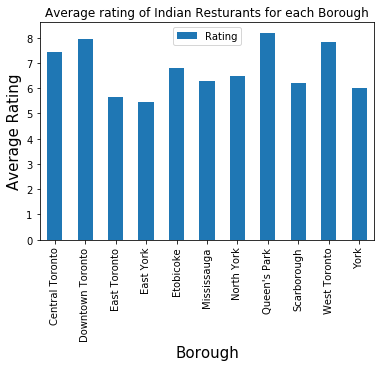

In [55]:
# title
plt.title('Average rating of Indian Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [56]:
ny_neighbourhood_stats=ny_neighbourhood_stats[ny_neighbourhood_stats['Average Rating']>=8.0]

In [57]:
ny_neighbourhood_stats

,Neighbourhood,Average Rating
2,"Brockton, Exhibition Place, Parkdale Village",8.1
3,"Cabbagetown, St. James Town",8.2
6,Christie,8.5
7,Church and Wellesley,8.2
13,"High Park, The Junction South",8.3
16,"Maryvale, Wexford",8.0
18,Queen's Park,8.2


In [58]:
ny_neighbourhood_stats=pd.merge(ny_neighbourhood_stats,Rajtdf, on='Neighbourhood')

In [59]:
ny_neighbourhood_stats=ny_neighbourhood_stats[['Borough','Neighbourhood','Average Rating']]

In [60]:
ny_neighbourhood_stats

,Borough,Neighbourhood,Average Rating
0,West Toronto,"Brockton, Exhibition Place, Parkdale Village",8.1
1,Downtown Toronto,"Cabbagetown, St. James Town",8.2
2,Downtown Toronto,Christie,8.5
3,Downtown Toronto,Church and Wellesley,8.2
4,West Toronto,"High Park, The Junction South",8.3
5,Scarborough,"Maryvale, Wexford",8.0
6,Queen's Park,Queen's Park,8.2


In [61]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.653963, -79.387207.


In [62]:
# create map of New York using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Borough, Neighbourhood in zip (Rajtdf['Latitude'],Rajtdf['Longitude'], Rajtdf['Borough'],Rajtdf['Neighbourhood']):
    label = '{}, {}'.format(Neighbourhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

In [ ]:
Conclusion
Downtown Toronto(Chritie), Downtown Cabbagetown, St. James Town )are some of the best neighborhoods for indian cuisine.
Queen's Park have potential Indian Resturant Market
Etobicoke ranks last in average rating of Indian Resturants.

Limitations
The ranking is purely on basis of rating of resturants
The accuracy of data depends purely depends on the data provided by FourSquare